# Машинное обучение

Машинное обучение - довольно широкий термин. Обычно под ним понимают класс алгоритмов, которые не программируются явно, а "обучаются" на определенных данных, и принимают решения на основе выученных закономерностей в обучающих данных. Такой подход позволил добиться успеха во многих областях, где программирование на строгих правилах требовало бы намного больших усилий, чем работа с данными для обучения.

Одна из самых полных библиотек для задач, связанных с машинным, обучением - это scikit-learn. В ней реализованы не только сами алгоритмы машинного обучения, но еще и инструменты для обработки и анализа данных, а также для проверки и анализа результатов. Установим ее.

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Какие задачи решает машинное обучение?

Сейчас - почти любые. Поэтому один из первых шагов - понять, как именно сформировать имеющуюся бизнес-задачу в терминах задачи машинного обучения.

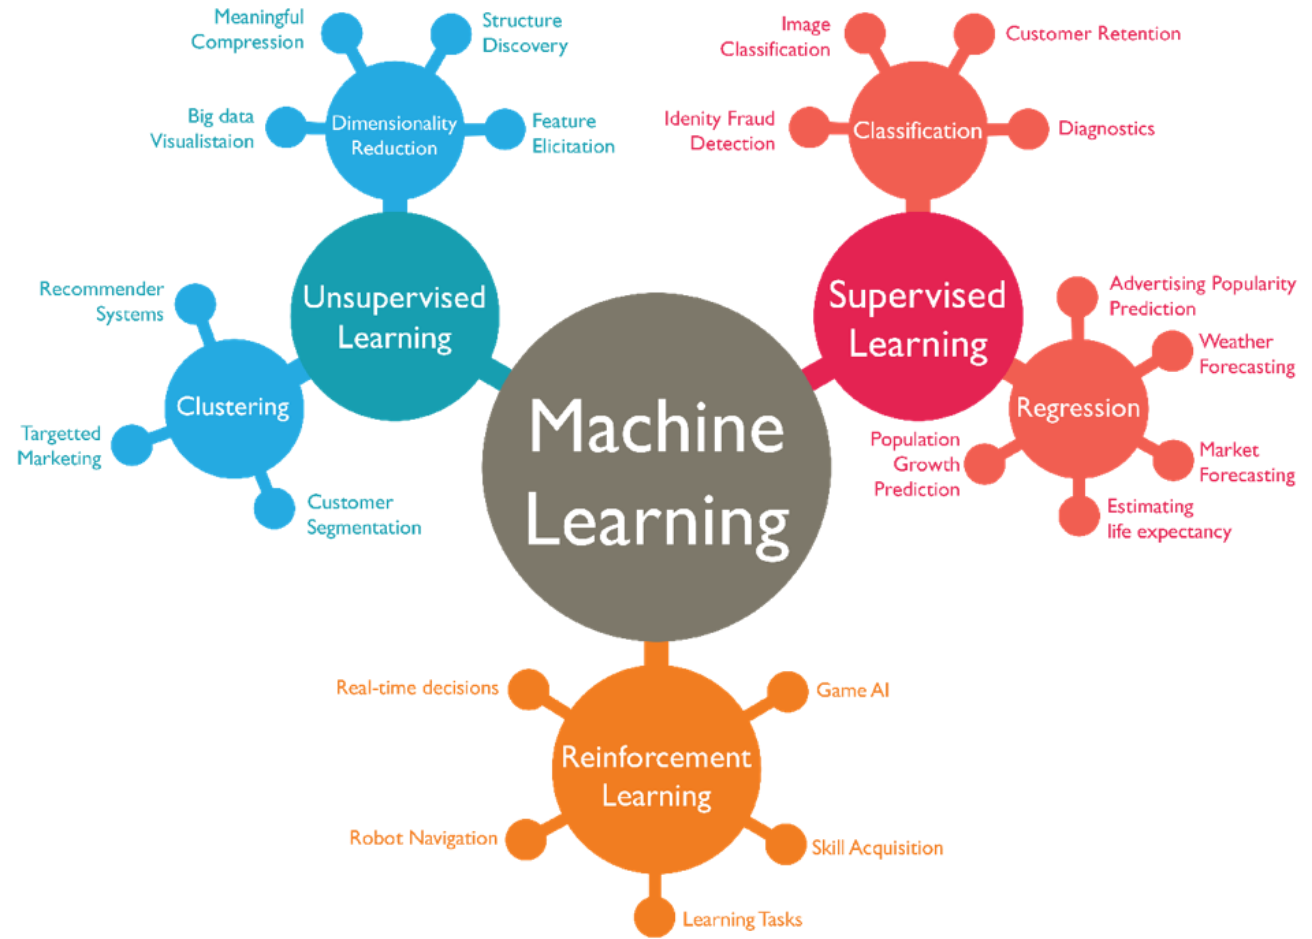

# Задачи обучения с учителем (Supervised Learning)

Сегодня будем разбирать преимущеставенно один тип задач - Supervised Learning. Алгоритмы обучения с учителем являются одними из наиболее распространенных методов машинного обучения, которые используются для создания моделей на основе **размеченных данных**. Они позволяют решать задачи классификации и регрессии, предсказывая значения целевой переменной на основе входных данных. 

## Задача классификации

Задачи классификации в машинном обучении относятся к типу задач, в которых необходимо разделить данные на заданные категории или классы на основе входных данных. Это может быть классификация электронных писем на спам и не спам, определение заболевания у пациента на основе медицинских данных, распознавание изображений и т.д. В качестве примера возьмем датасет вин и по признакам вина попробуем определять его производителя

In [ ]:
from sklearn import datasets

data = datasets.load_wine()

In [ ]:
X = data.data
y = data.target

Посмотрим на размерность наших данных

In [ ]:
X.shape

(178, 13)

И то, какие признаки нам доступны

In [ ]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Будем использовать только первые два признака - доли алкоголя и яблочной кислоты

In [ ]:
X = X[:, :2]

Если мы сразу будем обучать модель на всем датасете, то столкнемся с проблемой - у нас не останется данных для проверки качества модели. Мы можем проверить качество на обучающей выборке, но это будут те примеры, на которых модель обучалась, и которые уже близко знает - в продакшне же модель будет встречать примеры, которые не видела при обучении. Поэтому для оценки качества модели нужно выделить отдельную тестовую выборку.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Логистическая регрессии

Обучаем модель на обучающей выборке

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0)

Визуализируем результаты

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay


def visualize_classification_results(model, X, y):
    _, ax = plt.subplots(figsize=(4, 3))
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.Paired,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        xlabel="Alcohol",
        ylabel="Malic Acid",
        eps=0.5,
    )

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)

На обучающей выборке

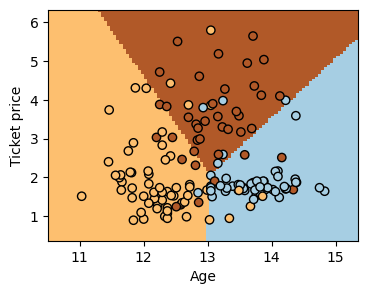

In [ ]:
visualize_classification_results(logreg, X_train, y_train)

На тестовой выборке

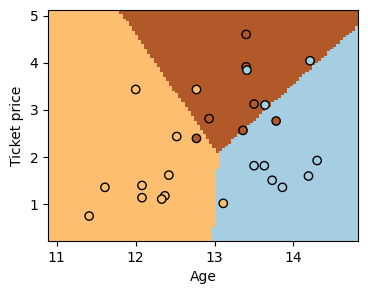

In [ ]:
visualize_classification_results(logreg, X_test, y_test)

### k-ближайших соседей

Довольно простой алгоритм, принцип работы которого заключается в том, что для каждой точки, для которой нужно сделать предсказание, алгоритм выбирает k ближайших точек в пространстве признаков, и делает предсказание на их основе (например, взяв среднее значение целевой переменной среди них)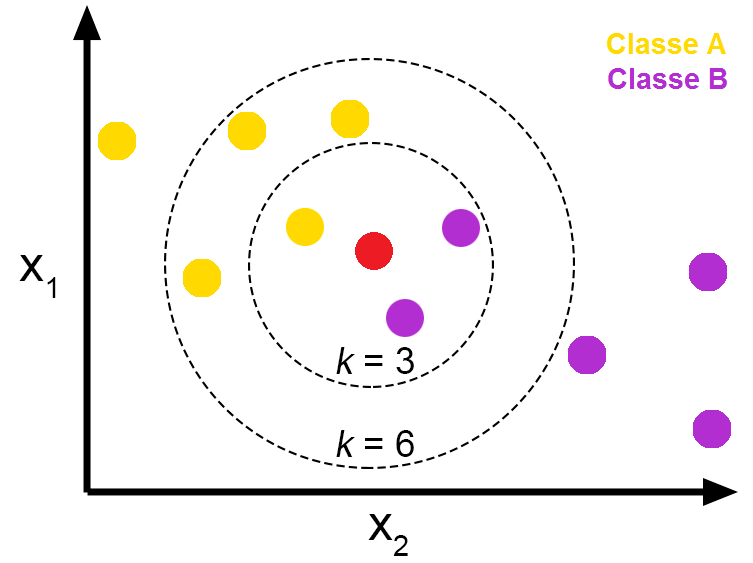

Зададим количество соседей и обучим алгоритм.

In [ ]:
from sklearn import neighbors

n_neighbors = 3

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Визуализируем результат

[]

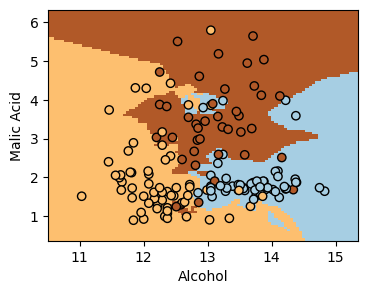

In [ ]:
visualize_classification_results(knn, X_train, y_train)
plt.plot()

Посмотрим, что будет, если зададим k побольше

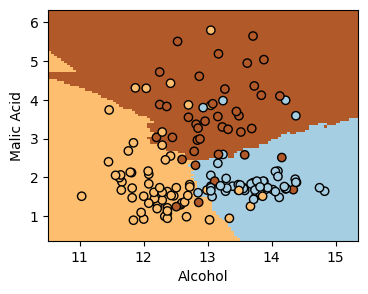

In [ ]:
n_neighbors = 25

knn_25 = neighbors.KNeighborsClassifier(n_neighbors)
knn_25.fit(X_train, y_train)

visualize_classification_results(knn_25, X_train, y_train)

### Решающие деревья

Классификация решающими деревьями - это метод, при котором строится дерево решений, где каждый узел - это тест на значение признака, а каждое ребро - возможное значение этого признака. Дерево разбивает выборку на подмножества, которые максимально однородны по целевой переменной. Каждый лист дерева представляет прогноз для объектов, которые попадают в этот лист. 
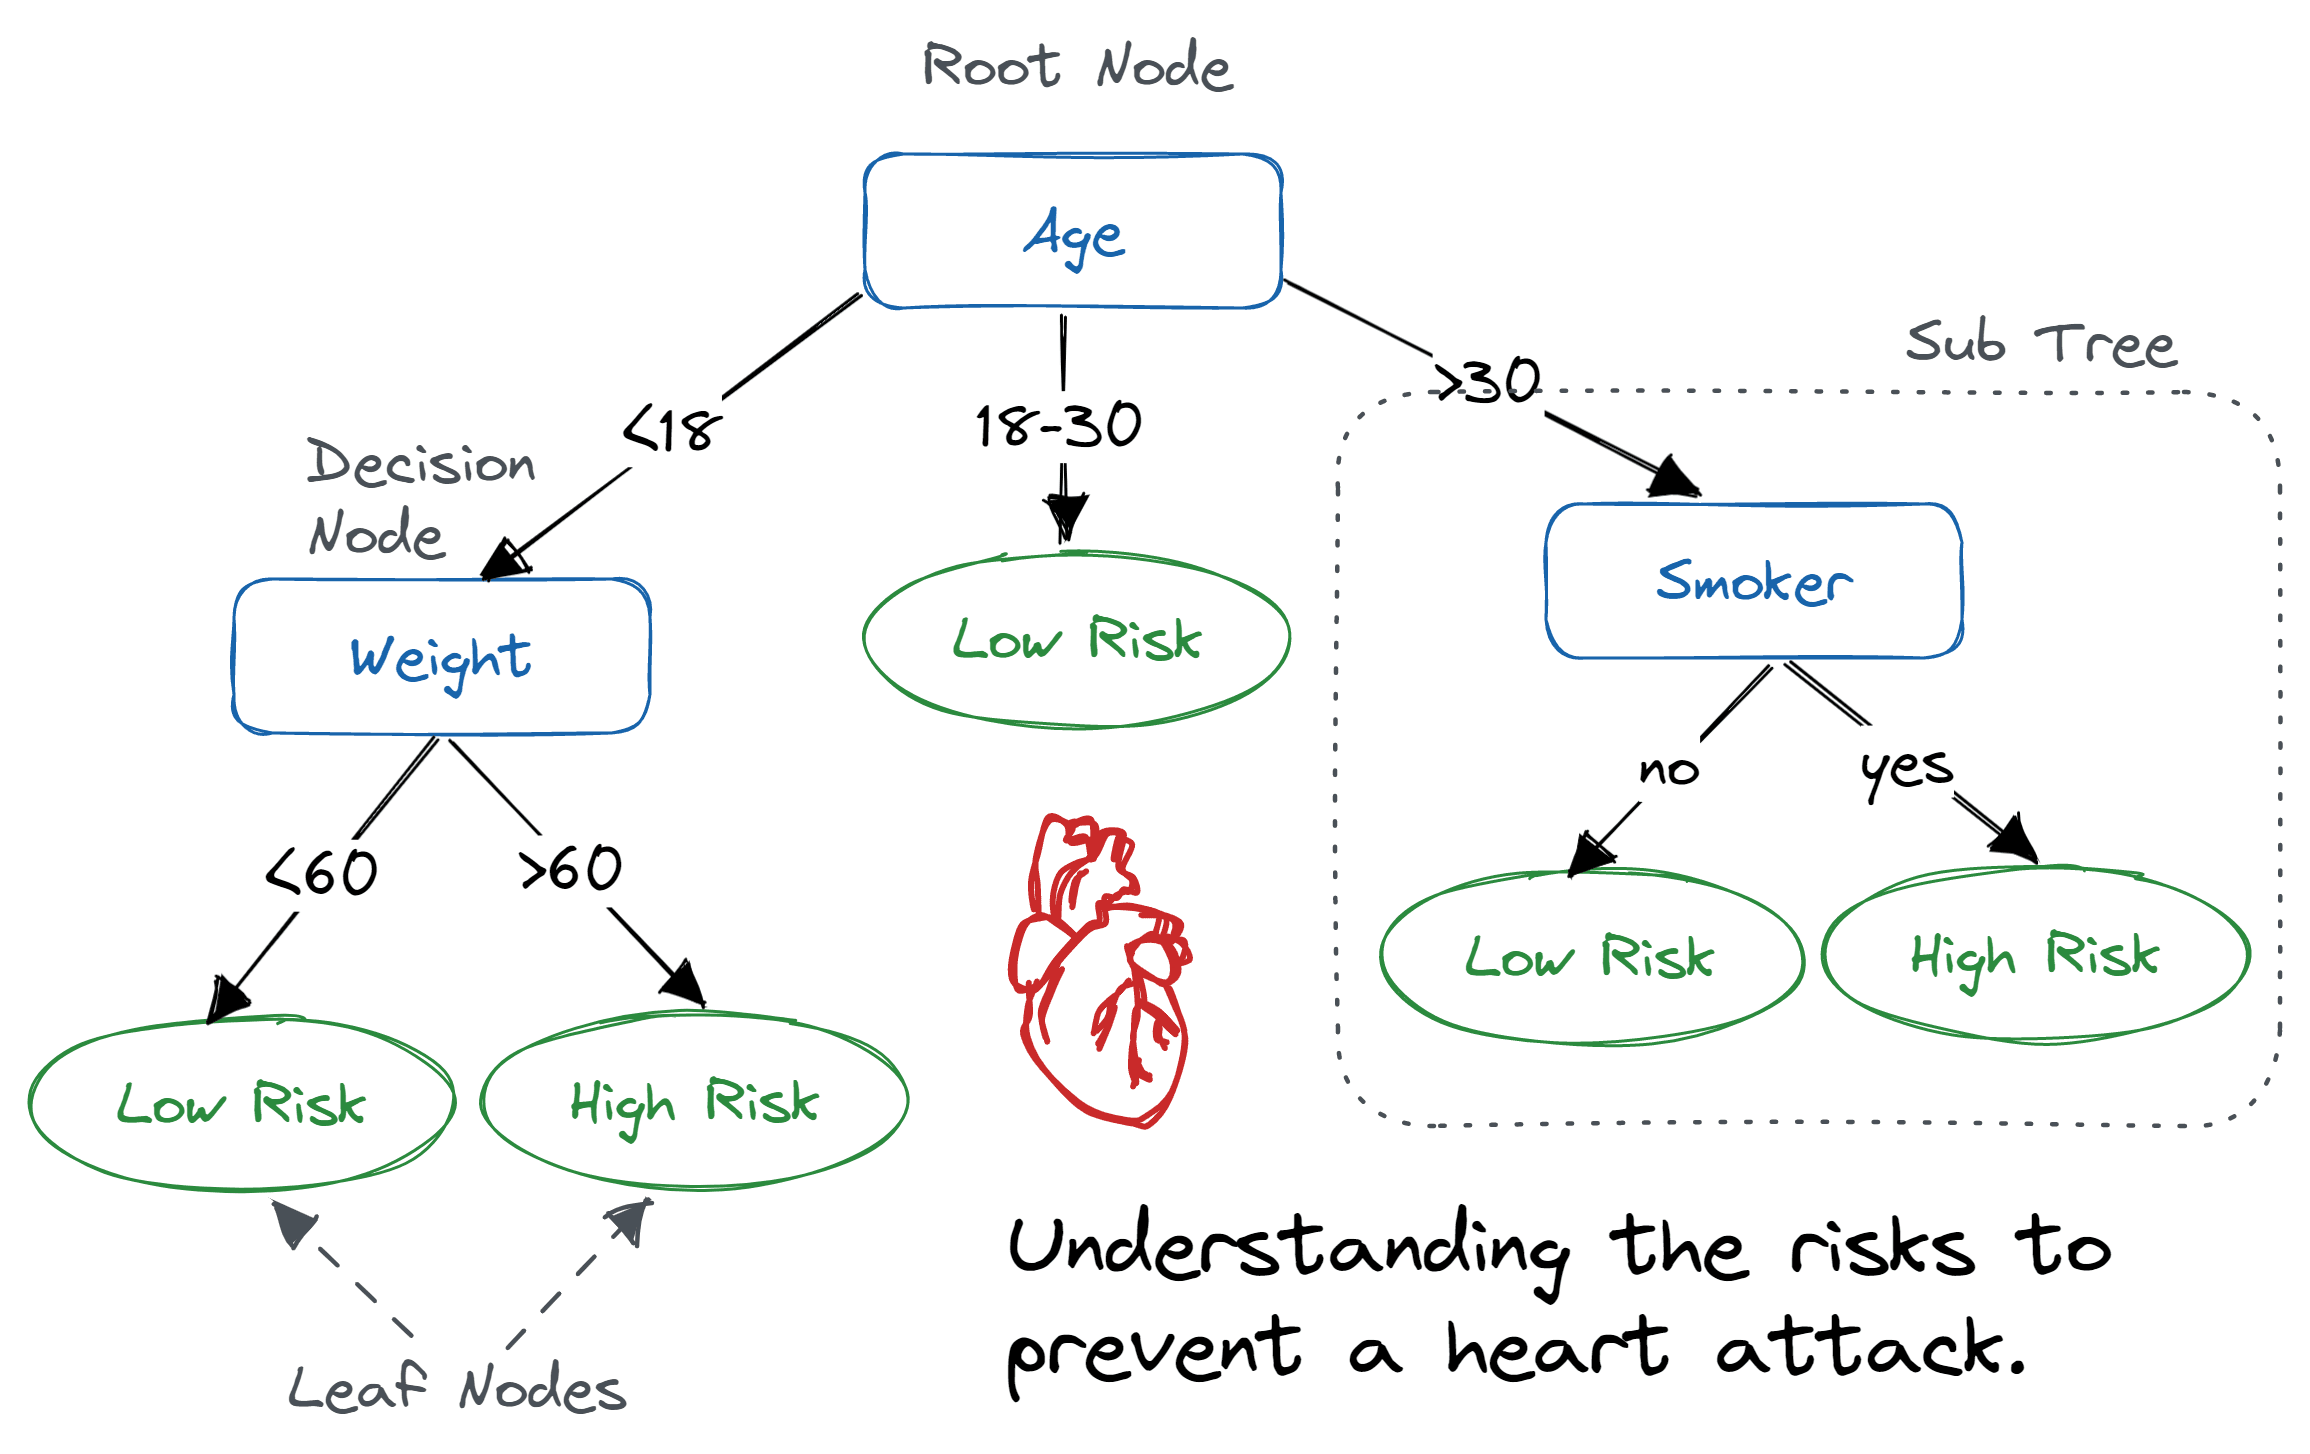

Создаем модель

In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=2) 
tree_clf = tree_clf.fit(X_train, y_train)

Визуализируем само дерево

[Text(0.5, 0.8333333333333334, 'Alcohol <= 12.755\ngini = 0.659\nsamples = 151\nvalue = [50, 60, 41]'),
 Text(0.25, 0.5, 'Malic Acid <= 2.96\ngini = 0.271\nsamples = 62\nvalue = [0, 52, 10]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.115\nsamples = 49\nvalue = [0, 46, 3]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.497\nsamples = 13\nvalue = [0, 6, 7]'),
 Text(0.75, 0.5, 'Malic Acid <= 2.235\ngini = 0.555\nsamples = 89\nvalue = [50, 8, 31]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.318\nsamples = 54\nvalue = [44, 6, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.372\nsamples = 35\nvalue = [6, 2, 27]')]

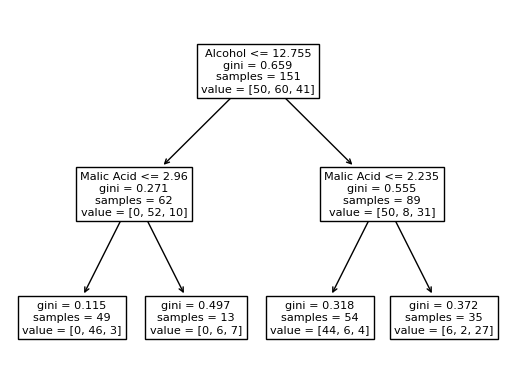

In [ ]:
tree.plot_tree(tree_clf, feature_names=['Alcohol', 'Malic Acid'])

И его предсказания

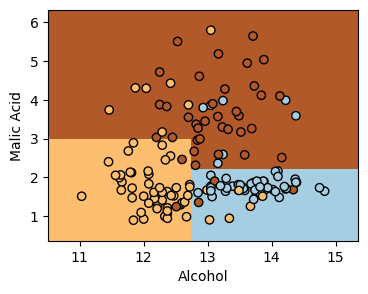

In [ ]:
visualize_classification_results(tree_clf, X_train, y_train)

### Сравнение моделей

По результатам работы наших моделей можем построить матрицу ошибок - Confusion Matrix.

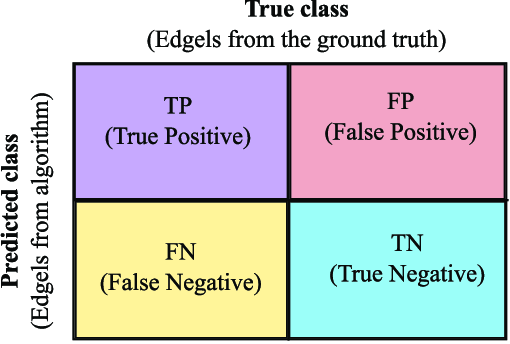

In [ ]:
from sklearn import metrics

classifiers = [
    logreg,
    knn,
    tree_clf
]

Доля верных ответов (Accuracy) - отношение количества верных ответов к количеству всех ответов

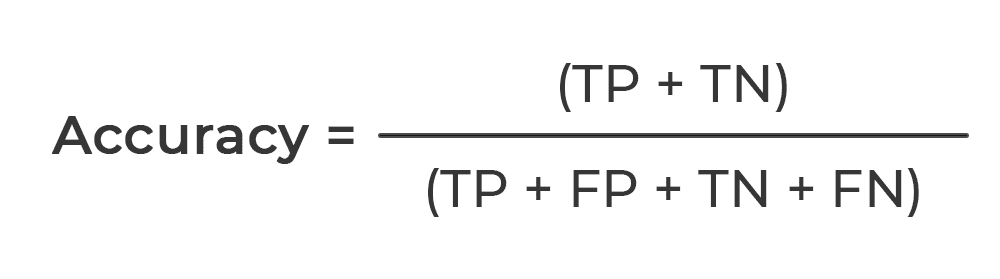

In [ ]:
for classifier in classifiers:
    print(f'{classifier} has accuracy of {metrics.accuracy_score(y_test, classifier.predict(X_test))}')

LogisticRegression(C=100000.0) has accuracy of 0.7407407407407407
KNeighborsClassifier(n_neighbors=3) has accuracy of 0.8148148148148148
DecisionTreeClassifier(max_depth=2) has accuracy of 0.7777777777777778


Точность (Precision) - какая доля предсказанных моделью положительных значений была действительно положительной?

Полнота (Recall) - какую долю действительно положительного класса наша модель смогла предсказать как положительную?

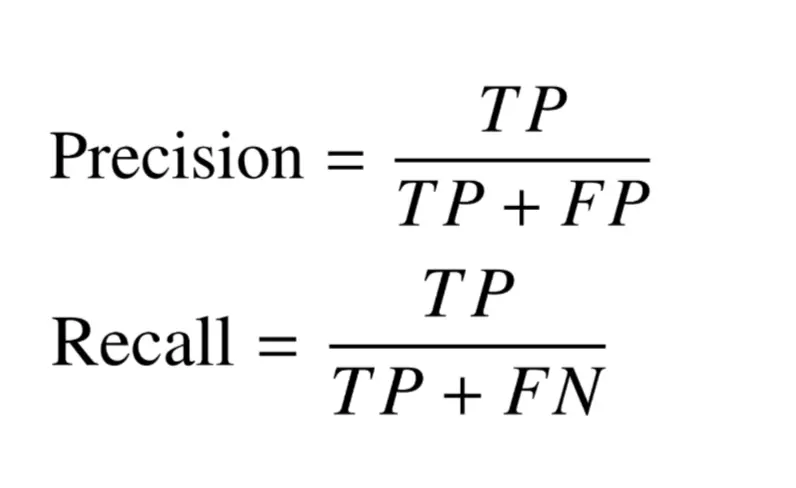

In [ ]:
for classifier in classifiers:
    print(f'{classifier} has precision of {metrics.precision_score(y_test, classifier.predict(X_test), average="weighted")}')

LogisticRegression(C=100000.0) has precision of 0.7606995884773662
KNeighborsClassifier(n_neighbors=3) has precision of 0.8919753086419754
DecisionTreeClassifier(max_depth=2) has precision of 0.8443562610229278


In [ ]:
for classifier in classifiers:
    print(f'{classifier} has recall of {metrics.recall_score(y_test, classifier.predict(X_test), average="weighted")}')

LogisticRegression(C=100000.0) has recall of 0.7407407407407407
KNeighborsClassifier(n_neighbors=3) has recall of 0.8148148148148148
DecisionTreeClassifier(max_depth=2) has recall of 0.7777777777777778


f-мера (f1-score) - Объединение precision и recall через среднее гармоническое

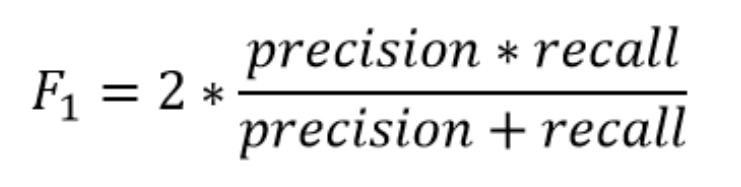

In [ ]:
for classifier in classifiers:
    print(f'{classifier} has f1 score of {metrics.f1_score(y_test, classifier.predict(X_test), average="weighted")}')

LogisticRegression(C=100000.0) has f1 score of 0.746537503890445
KNeighborsClassifier(n_neighbors=3) has f1 score of 0.8243664717348929
DecisionTreeClassifier(max_depth=2) has f1 score of 0.78411306042885


ROC-AUC - область под ROC-кривой. Можно интерпретировать как долю верно отранжированных пар. В отличие от других методов использует не метки предсказания модели, а числовые предсказания, поэтому эта метрика бывает полезна в моделях, которые требуют предсказания вероятности, а не строгой метки. Идея - обобщить информацию о метриках модели, избавившись от зависимости от выбора порога разбиения на метки.


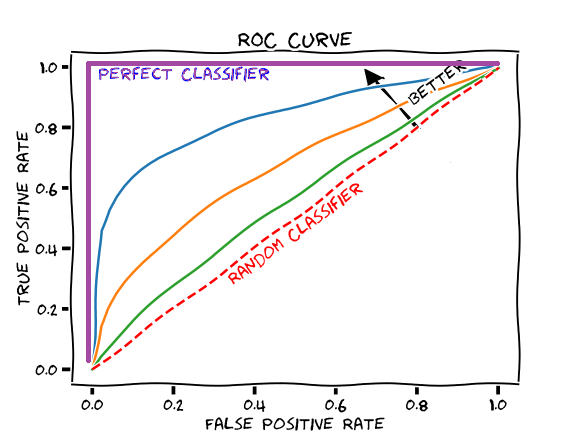

## Задача регрессии

Задачи регрессии в машинном обучении относятся к типу задач, в которых необходимо предсказать непрерывную числовую переменную на основе входных данных. Это может быть предсказание цены на недвижимость, дохода, температуры и т.д. В качестве примера рассмотрим задачу предсказания скорости развития диабета по bmi

Сначала загрузим датасет

In [ ]:
from sklearn import datasets
import numpy as np

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
diabetes_X.shape

(442, 10)

Там есть несколько признаков - оставим только BMI.

In [ ]:
diabetes_X = diabetes_X[:, 2:3]

Разобьем нашу выборку на обучающую и тестирующую

In [ ]:
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]

diabetes_y_train = diabetes_y[:-40]
diabetes_y_test = diabetes_y[-40:]

In [ ]:
diabetes_X_test.shape

(40, 1)

### Линейные модели

Уже знакомые с предыдущего семинара - предсказываем линейное отношение между переменными: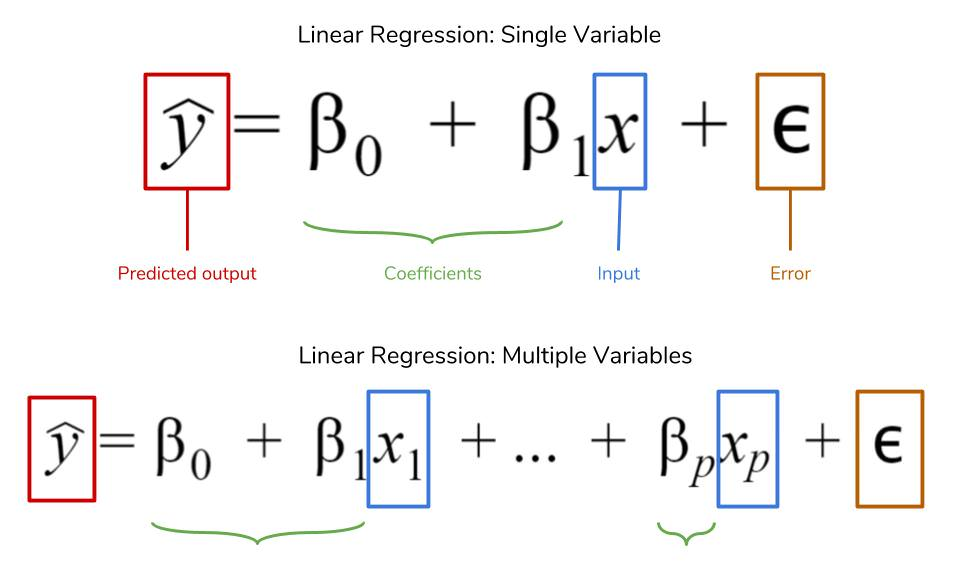

Определим нашу линейную модель и обучим ее на обучающей выборке.

In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

lr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = lr.predict(diabetes_X_test)

Посмотри на веса, которые использовала модель:

In [ ]:
lr.coef_, lr.intercept_

(array([955.44001079]), 152.90430035543224)

Визуализируем нашу модель:

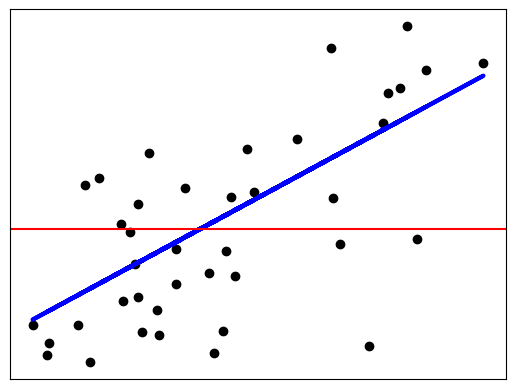

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.axline((0, diabetes_y_test.mean()), (0.1, diabetes_y_test.mean()), color='red')

plt.xticks(())
plt.yticks(())

plt.show()

### knn и деревья

Некоторые алгоритмы, которые используются при классификации, можно использовать и для регрессии. Например, в sklearn реализованы регрессоры на основе kNN и деревьев.

Обучим kNN на наших данных:

In [ ]:
n_neighbors = 5

knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = knn_reg.predict(diabetes_X_test)

In [ ]:
tree_reg = tree.DecisionTreeClassifier(max_depth=4) 
tree_reg = tree_reg.fit(diabetes_X_train, diabetes_y_train)

Сравнение результатов моделей

In [ ]:
models = [
    lr,
    knn_reg,
    tree_reg,
]

for model in models:
    print(model)
    print("Mean squared error: %.2f" % metrics.mean_squared_error(diabetes_y_test, model.predict(diabetes_X_test)))
    print("Root mean squared error: %.2f" % metrics.mean_squared_error(diabetes_y_test, model.predict(diabetes_X_test), squared=False))
    print("Coefficient of determination: %.2f" % metrics.r2_score(diabetes_y_test, model.predict(diabetes_X_test)))


LinearRegression()
Mean squared error: 3309.16
Root mean squared error: 57.53
Coefficient of determination: 0.42
KNeighborsRegressor()
Mean squared error: 4025.13
Root mean squared error: 63.44
Coefficient of determination: 0.30
DecisionTreeClassifier(max_depth=4)
Mean squared error: 7679.18
Root mean squared error: 87.63
Coefficient of determination: -0.34
